# El teorema maestro

En este tema vamos a usar mucho el siguiente teorema maestro (extraído de [estos apuntes](https://www.math.umd.edu/~immortal/CMSC351/notes/mastertheorem.pdf)):
![title](master_theorem.png)

Principalmente los puntos 1 y 2.

# Problema de la multiplicación de enteros

## Definición

Problema: dados dos números representados como tablas de $n$ cifras, generar un nuevo array de cifras que contenga su multiplicación.

Ejemplo de entrada:

$123$ se representa como:
$
u=\begin{bmatrix}
3 & 2 & 1 
\end{bmatrix}
$

$345$ se representa como:
$
v=\begin{bmatrix}
5 & 4 & 3 
\end{bmatrix}
$

Ejemplo de salida

42435 se representa como: $
r=\begin{bmatrix}
5 & 3 & 4 & 2 & 4
\end{bmatrix}
$



## Algoritmo clásico

Vamos a definir un par de funciones que nos van a ser útiles (suma y desplazamiento).

In [2]:
def add_arrays(arr1, arr2):
    """Suma dos arrays. Los arrays no tienen necesariamente la misma longitud.
    Esto es Thetha(max(n,m)), si n = m, entonces Thetha(n)
    """
    carry = 0
    result = []
    
    for i in range(0, max(len(arr1), len(arr2)), 1):
        if i < len(arr1):
            digit1 = arr1[i]
        else:
            digit1 = 0

        if i < len(arr2):
            digit2 = arr2[i]
        else:
            digit2 = 0
        
        total = digit1 + digit2 + carry
        result.append(total % 10)
        carry = total // 10
    
    if carry:
        result.append(carry)
    
    return result

In [1]:
def shift_array(arr, s):
    """Multiplica por 10^s. Thetha(s)."""
    return [0] * s + arr

In [3]:
def print_integer(arr):
    r = ''
    for a in reversed(arr):
        r += str(a)
    print(r)
    
def multiplicacion_directa(arr1, arr2):
    
    # inicialización
    result = [0] * (len(arr1) + len(arr2))
    
    # multiplicación
    for i in range(0, len(arr1), 1):
        aux = [0] * (len(arr1) + len(arr2))
        # multiplico arr1[i] por arr2
        for j in range(0, len(arr2), 1):
            s = aux[j] + arr1[i] * arr2[j]
            aux[j] = s % 10
            carry = s // 10
            aux[j + 1] += carry
        # desplazo y sumo
        result = add_arrays(result, shift_array(aux, i))
    
    # eliminar 0s innecesarios
    while len(result) > 1 and result[-1] == 0:
        result.pop()
    
    return result


In [4]:
# Ejemplo
arr1 = [3, 2, 1]  # 123
arr2 = [5, 4, 3]  # 345

result = multiplicacion_directa(arr1, arr2)
print("Resultado:")
print_integer(result)

Resultado:
42435


**Proposición.** El algoritmo clásico es $\Theta(n^2)$.

*Demonstración.*

```python
def multiplicacion_directa(arr1, arr2):
    
    # inicialización -> depende de la implementación, en el peor de los casos: an + b
    result = [0] * (len(arr1) + len(arr2))
    
    # multiplicación -> dos bucles anidados: cn^2 + dn + e
    for i in range(0, len(arr1), 1):
        aux = [0] * (len(arr1) + len(arr2))
        for j in range(0, len(arr2), 1):
            s = aux[j] + arr1[i] * arr2[j]
            aux[j] = s % 10
            carry = s // 10
            aux[j + 1] += carry
        result = add_arrays(result, shift_array(aux, i)) # todas Thetha(n) pero se ejecutan en secuencia
    
    # eliminar los 0s innecesarios -> Esto como mucho se ejecuta n veces, fn + g
    while len(result) > 1 and result[-1] == 0:
        result.pop()
    
    return result
```

De modo que el tiempo se puede expresar $t(n) = hn^2 + in + j$ siendo $h,i,j$ constantes. Por tanto, el algoritmo es $\Theta(n^2)$.

## Solución DyV ingénua

Vamos a definir un par de funciones que nos van a ser útiles.

In [5]:
def normalize_length(arr1, arr2):
    """Normaliza los arrays para que tengan la misma longitud. O(|m-n|), acotado por O(2*max(n,m))"""
    diff = len(arr1) - len(arr2)
    if diff > 0:
        arr2.extend([0] * diff)
    elif diff < 0:
        arr1.extend([0] * (-diff))
    return arr1, arr2

In [6]:
def sub_arrays(arr1, arr2):
    """Resta dos arrays de la misma longitud. Se asume que arr1 >= arr2.
    Es O(n).
    """
    carry = 0
    result = []
    
    for i in range(len(arr1)):
        digit1 = arr1[i]
        digit2 = arr2[i] if i < len(arr2) else 0
        diff = digit1 - digit2 - carry
        if diff < 0:
            diff += 10
            carry = 1
        else:
            carry = 0
        result.append(diff)
    
    while len(result) > 1 and result[-1] == 0:
        result.pop()
    
    return result

La idea del algoritmo de DyV ingénuo es tal que así:

$1234$ se representa como:
$
u=\begin{bmatrix}
4 & 3 & 2 & 1 
\end{bmatrix}
= [u_1, u_2]$

$u_1=[4,3]$, $u_2=[2,1]$. Así pues $u=10^2u_2 + u_1$.

$3456$ se representa como:
$
v=\begin{bmatrix}
6 & 5 & 4 & 3 
\end{bmatrix}
= [v_1,v_2]$

$v_1=[6,5]$, $v_2=[4,3]$. Así pues $v=10^2v_2 + v_1$.

De modo que $r= u v = (10^2u_2 + u_1)(10^2v_2 + v_1) = 10^4u_2v_2 + 10^2(u_2v_1 + v_2u_1) + u_1v_1$. En general, para dos números cualquiera de la misma longitud y diviendo a la mitad los números, se tiene esto:

![title](m.png)


In [7]:
def dyv_ingenuo(arr1, arr2):
    arr1, arr2 = normalize_length(arr1, arr2)
    
    # Caso base
    if len(arr1) == 1 and len(arr2) == 1:
        return [arr1[0] * arr2[0] % 10] + ([arr1[0] * arr2[0] // 10] if arr1[0] * arr2[0] >= 10 else [])
    # fin caso base

    # divimos los arrays
    n = len(arr1)
    m = n // 2
    low1, high1 = arr1[:m], arr1[m:]
    low2, high2 = arr2[:m], arr2[m:]
    
    # 10^2s wy
    h_h = dyv_ingenuo(high1, high2)
    first_term = shift_array(h_h, 2 * m)

    # 10^s (wz + xy)
    h1_l2 = dyv_ingenuo(high1, low2)
    h2_l1 = dyv_ingenuo(high2, low1)
    s1 = add_arrays(h1_l2, h2_l1)
    second_term = shift_array(s1, m)

    # xz
    thrid_term = dyv_ingenuo(low1, low2)

    #sumamos todo
    result = add_arrays(add_arrays(thrid_term,second_term), first_term)

    # eliminamos 0s para que quede bonito
    while len(result) > 1 and result[-1] == 0:
        result.pop()
        
    return result

In [8]:
# Ejemplo
arr1 = [3, 2, 1]  # 123
arr2 = [5, 4, 3]  # 345

result = dyv_ingenuo(arr1, arr2)
print("Resultado:")
print_integer(result)

Resultado:
42435


**Proposición.** El algoritmo DyV ingénuo es $\Theta(n^2)$. En consecuencia, este algoritmo es 💩 y, habiendo un método iterativo directo, nadie lo usa.

*Demonstración.*

```python
def dyv_ingenuo(arr1, arr2):
    arr1, arr2 = normalize_length(arr1, arr2) # esto está acotado por el máximo de ambos arrays y la longitud de la multiplicación nunca va a ser superior a 2n -> O(n)
    
    # Caso base -> constante
    if len(arr1) == 1 and len(arr2) == 1:
        return [arr1[0] * arr2[0] % 10] + ([arr1[0] * arr2[0] // 10] if arr1[0] * arr2[0] >= 10 else [])
    # fin caso base

    # divimos los arrays, O(n) o constante
    n = len(arr1)
    m = n // 2
    low1, high1 = arr1[:m], arr1[m:]
    low2, high2 = arr2[:m], arr2[m:]
    
    # 10^2s wy
    h_h = dyv_ingenuo(high1, high2) # t(n/2)
    first_term = shift_array(h_h, 2 * m) # esto es O(n)

    # 10^s (wz + xy)
    h1_l2 = dyv_ingenuo(high1, low2) # t(n/2)
    h2_l1 = dyv_ingenuo(high2, low1) # t(n/2)
    s1 = add_arrays(h1_l2, h2_l1) # esto es O(n)
    second_term = shift_array(s1, m) # esto es O(n)

    # xz
    thrid_term = dyv_ingenuo(low1, low2) # t(n/2)

    #sumamos todo
    result = add_arrays(add_arrays(thrid_term,second_term), first_term) # esto es O(n) ya que son dos sumas, una después de otra

    # eliminamos 0s para que quede bonito, acotado por n
    while len(result) > 1 and result[-1] == 0:
        result.pop()
        
    return result
```

De modo que el tiempo $t(n)$ se puede expresar de la siguiente manera:

1. Si caso base: constante $a$.
2. En otro caso: $4t(n/2) + O(n)$

Así pues, usando el teorema maestro, se puede concluir que $t(n) \in \Theta(n^2)$.

## Solución DyV inteligente: Karatsuba

Idea de Karatsuba: evitar hacer $4t(n/2)$ y hacer solo $3$ operaciones. Y esto es posible ya que:

$r= u v = (10^2u_2 + u_1)(10^2v_2 + v_1) = 10^4u_2v_2 + 10^2(u_2v_1 + v_2u_1) + u_1v_1 = 10^4u_2v_2 + 10^2[(u_1+u_2)(v_2+v_1) - (u_2v_2 + u_1v_1)] + u_1v_1$

Así pues solo tenemos que hacer $3$ multiplicaciones:
- $u_1v_1$
- $u_2v_2$
- $(u_1+u_2)(v_1+v_2)$

In [9]:
def karatsuba_arrays(arr1, arr2):
    arr1, arr2 = normalize_length(arr1, arr2)
    
    # Caso base
    if len(arr1) == 1 and len(arr2) == 1:
        return [arr1[0] * arr2[0] % 10] + ([arr1[0] * arr2[0] // 10] if arr1[0] * arr2[0] >= 10 else [])
    # fin caso base

    # dividimos array
    n = len(arr1)
    m = n // 2
    low1, high1 = arr1[:m], arr1[m:]
    low2, high2 = arr2[:m], arr2[m:]

    # u_1v_1
    z0 = karatsuba_arrays(low1, low2)
    # (u_1 + u_2)(v_1 + v_2)
    z1 = karatsuba_arrays(add_arrays(low1, high1), add_arrays(low2, high2))
    # u_2v_2
    z2 = karatsuba_arrays(high1, high2)

    # calcular el resultado con el chorizo de arriba
    result = add_arrays(add_arrays(shift_array(z2, 2*m), shift_array(sub_arrays(z1, add_arrays(z2, z0)), m)), z0)

    # eliminamos 0s para que quede bonito
    while len(result) > 1 and result[-1] == 0:
        result.pop()
    
    return result


In [10]:
# Ejemplo
arr1 = [3, 2, 1]  # 123
arr2 = [5, 4, 3]  # 345

result = karatsuba_arrays(arr1, arr2)
print("Resultado:")
print_integer(result)

Resultado:
42435


**Proposición.** El algoritmo DyV Karatsuba es $\Theta(n^{\log_23})\sim \Theta(n^{1.59})$.

*Demonstración.*

```python
def karatsuba_arrays(arr1, arr2):
    arr1, arr2 = normalize_length(arr1, arr2) # O(n)
    
    # Caso base, constante
    if len(arr1) == 1 and len(arr2) == 1:
        return [arr1[0] * arr2[0] % 10] + ([arr1[0] * arr2[0] // 10] if arr1[0] * arr2[0] >= 10 else [])
    # fin caso base

    # dividimos array, O(n) o constante
    n = len(arr1)
    m = n // 2
    low1, high1 = arr1[:m], arr1[m:]
    low2, high2 = arr2[:m], arr2[m:]

    # u_1v_1
    z0 = karatsuba_arrays(low1, low2) # t(n/2)
    # (u_1 + u_2)(v_1 + v_2)
    z1 = karatsuba_arrays(add_arrays(low1, high1), add_arrays(low2, high2)) # t(n/2) + O(n)
    # u_2v_2
    z2 = karatsuba_arrays(high1, high2)# t(n/2)

    # calcular el resultado con el chorizo de arriba
    result = add_arrays(add_arrays(shift_array(z2, 2*m), shift_array(sub_arrays(z1, add_arrays(z2, z0)), m)), z0) # O(n)

    # eliminamos 0s para que quede bonito, acotado por n
    while len(result) > 1 and result[-1] == 0:
        result.pop()
    
    return result
```

De modo que el tiempo $t(n)$ se puede expresar de la siguiente manera:

1. Si caso base: constante $a$.
2. En otro caso: $3t(n/2) + O(n)$

Así pues, usando la fórmula maestra, se puede concluir que $t(n) \in \Theta(n^{\log_23})$.

## Karatsuba no es 🔝 cuando la longitud de la entrada es pequeña

In [11]:
import numpy as np
import time

def measure_time_complexity(func=karatsuba_arrays):
    sizes = [2**i for i in range(6, 14)]
    times = []
    
    for size in sizes:
        arr1 = np.random.randint(0, 10, size).tolist()
        arr2 = np.random.randint(0, 10, size).tolist()
        
        start_time = time.time()
        func(arr1, arr2)
        end_time = time.time()
        
        times.append(end_time - start_time)
        
    return sizes, times

sizes_k, times_k = measure_time_complexity(func=karatsuba_arrays)
sizes_dv, times_dv = measure_time_complexity(func=dyv_ingenuo)
sizes_d, times_d = measure_time_complexity(func=multiplicacion_directa)

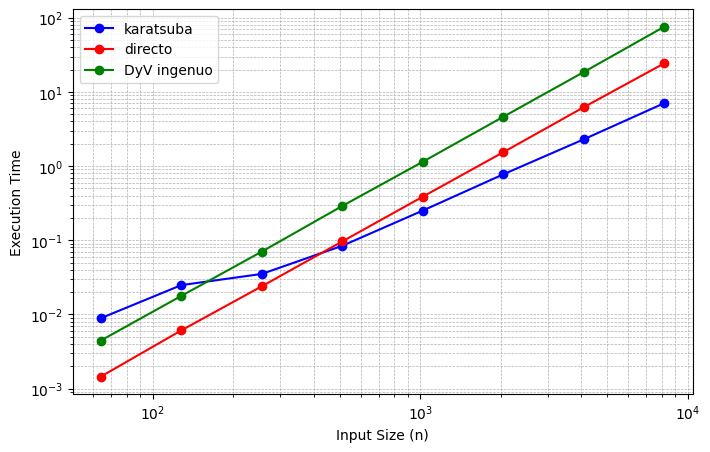

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(sizes_k, times_k, marker='o', linestyle='-', color='b', label='karatsuba')
plt.plot(sizes_d, times_d, marker='o', linestyle='-', color='r', label='directo')
plt.plot(sizes_dv, times_dv, marker='o', linestyle='-', color='g', label='DyV ingenuo')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time")
plt.title("")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

In [13]:
# compute slope
from scipy.stats import linregress


print(f'Potencia karatsuba: {linregress(np.log(sizes_k), np.log(times_k)).slope:.2f}')
print(f'Potencia directo: {linregress(np.log(sizes_d), np.log(times_d)).slope:.2f}')
print(f'Potencia DyV ingénuo: {linregress(np.log(sizes_dv), np.log(times_dv)).slope:.2f}')

Potencia karatsuba: 1.37
Potencia directo: 2.00
Potencia DyV ingénuo: 2.01
